<a href="https://colab.research.google.com/github/kghilothia06/customer_analysis/blob/master/model_building_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing python libraries

In [78]:
import numpy as np #for numerical computations
import pandas as pd #for reading the dataset
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for interactive visualizations

Importing the dataset

In [79]:
dataset = pd.read_excel('/content/Customers2.xlsx')

# exploring the dataset

In [80]:
dataset.info

<bound method DataFrame.info of      CustomerID  NumCalls  NumEmails  ...  PageVisits  PriorClient  MadeAPurchase
0             1        33         19  ...         0.0          Yes             No
1             2         0          1  ...         0.0           No             No
2             3         4          6  ...         0.0           No             No
3             4         0         10  ...         0.0           No             No
4             5         7          0  ...         0.0           No            Yes
..          ...       ...        ...  ...         ...          ...            ...
748         749         3          0  ...         0.0           No            Yes
749         750         0          4  ...         0.0           No            Yes
750         751        15          0  ...         0.0           No            Yes
751         752         0          1  ...         0.0          Yes            Yes
752         753        20          0  ...         0.0          Yes

In [81]:
dataset.shape

(753, 12)

In [82]:
#getting top 10 entries in dataset
dataset.head(10)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes
5,6,10,1,0,1,0,English,USA,30.0,0.0,Yes,No
6,7,5,0,0,0,0,English,USA,10.0,0.0,No,No
7,8,1,0,0,0,0,English,USA,4.0,0.0,No,No
8,9,26,0,0,0,0,English,India,15.0,0.0,No,Yes
9,10,11,0,0,0,0,Spanish,Spain,15.0,0.0,Yes,Yes


In [83]:
#getting last 10 entries in dataset
dataset.tail(10)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
743,744,0,0,1,2,0,Japanese,Japan,0.0,0.0,Yes,No
744,745,10,0,0,0,0,English,USA,0.0,0.0,No,Yes
745,746,0,1,0,0,0,English,France,0.0,0.0,Yes,Yes
746,747,9,1,0,0,0,English,USA,0.0,1.0,No,Yes
747,748,27,0,0,0,0,English,USA,0.0,0.0,No,Yes
748,749,3,0,0,0,0,German,Canada,0.0,0.0,No,Yes
749,750,0,4,0,0,0,German,Canada,0.0,0.0,No,Yes
750,751,15,0,0,0,0,English,India,0.0,0.0,No,Yes
751,752,0,1,0,0,0,Spanish,Colombia,0.0,0.0,Yes,Yes
752,753,20,0,0,0,0,German,Switzerland,0.0,0.0,Yes,Yes


In [84]:
dataset.describe

<bound method NDFrame.describe of      CustomerID  NumCalls  NumEmails  ...  PageVisits  PriorClient  MadeAPurchase
0             1        33         19  ...         0.0          Yes             No
1             2         0          1  ...         0.0           No             No
2             3         4          6  ...         0.0           No             No
3             4         0         10  ...         0.0           No             No
4             5         7          0  ...         0.0           No            Yes
..          ...       ...        ...  ...         ...          ...            ...
748         749         3          0  ...         0.0           No            Yes
749         750         0          4  ...         0.0           No            Yes
750         751        15          0  ...         0.0           No            Yes
751         752         0          1  ...         0.0          Yes            Yes
752         753        20          0  ...         0.0          Y

In [85]:
#checking for missing/null values
null_columns=dataset.columns[dataset.isnull().any()]
#taking care of null values
dataset.fillna(0,inplace=True)


# Data Preprocessing & Visualization

plotting histogram of frequency of 'NumCalls' column with range (0-19) (20-39) and so on



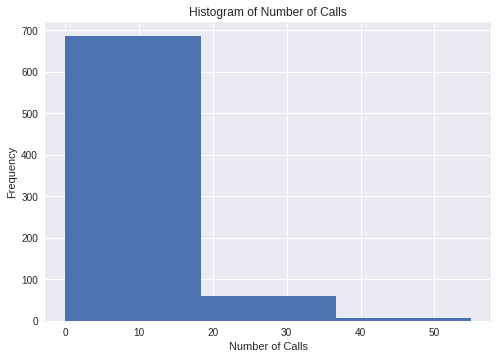

In [86]:
plt.style.use('seaborn')
plt.hist(dataset['NumCalls'] , bins=3)
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Calls')
plt.show()

plotting a bar graph of 'Country' column

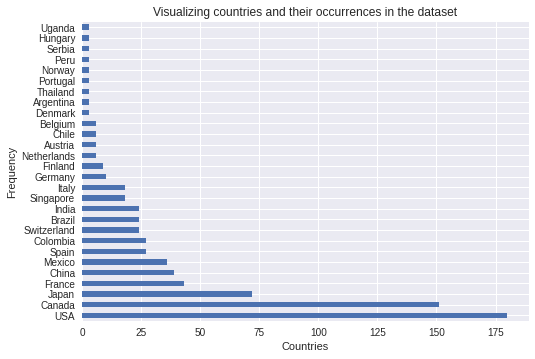

In [87]:
dataset['Country'].value_counts().plot(kind='barh')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Visualizing countries and their occurrences in the dataset')
plt.show()

adding a new column 'TotalInteractions' to the dataset 
that contains sum of the columns NumCalls, NumEmails, NumDownloads, NumEvents, and NumForms

In [88]:
dataset['TotalInteractions'] = dataset['NumCalls'] + dataset['NumEmails'] + dataset['NumDownloads'] + dataset['NumEvents'] + dataset['NumForms']

In [89]:
dataset.shape

(753, 13)

In [90]:
#rearranging the columns
mid = dataset['TotalInteractions']
dataset.drop(labels=['TotalInteractions'], axis=1, inplace = True)
dataset.insert(6, 'TotalInteractions', mid)

In [91]:
dataset.head(5)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,TotalInteractions,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,54,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,2,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,12,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,11,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,7,English,USA,11.0,0.0,No,Yes


Modifying the 'Country' column

In [92]:
#first we create dummy variables
top = ['USA', 'China', 'Japan', 'France', 'Canada']
dataset['Country'] = dataset['Country'].apply(lambda x : 'Other' if x not in top else x)
df1 = pd.get_dummies(dataset['Country'])

In [93]:
dataset['Country'].value_counts()

Other     268
USA       180
Canada    151
Japan      72
France     43
China      39
Name: Country, dtype: int64

In [94]:
#merging dataset and df1
dataset =pd.concat([dataset,df1],axis=1)

In [95]:
#we dont need 'Country' column anymore, hence we drop it
dataset.drop(['Country'],axis=1,inplace=True)

In [96]:
dataset.head(5)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,TotalInteractions,Language,WebVisits,PageVisits,PriorClient,MadeAPurchase,Canada,China,France,Japan,Other,USA
0,1,33,19,1,0,1,54,German,10.0,0.0,Yes,No,0,0,0,0,1,0
1,2,0,1,0,1,0,2,English,61.0,0.0,No,No,0,0,0,0,0,1
2,3,4,6,2,0,0,12,Spanish,1.0,0.0,No,No,0,0,0,0,1,0
3,4,0,10,0,0,1,11,English,26.0,0.0,No,No,0,0,0,0,1,0
4,5,7,0,0,0,0,7,English,11.0,0.0,No,Yes,0,0,0,0,0,1


Now, we perform label encoding on 'PriorClient' and 'MadeAPurchase' Column

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['PriorClient'] = le.fit_transform(dataset['PriorClient'])
dataset['MadeAPurchase'] = le.fit_transform(dataset['MadeAPurchase'])

In [98]:
dataset.head(5)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,TotalInteractions,Language,WebVisits,PageVisits,PriorClient,MadeAPurchase,Canada,China,France,Japan,Other,USA
0,1,33,19,1,0,1,54,German,10.0,0.0,1,0,0,0,0,0,1,0
1,2,0,1,0,1,0,2,English,61.0,0.0,0,0,0,0,0,0,0,1
2,3,4,6,2,0,0,12,Spanish,1.0,0.0,0,0,0,0,0,0,1,0
3,4,0,10,0,0,1,11,English,26.0,0.0,0,0,0,0,0,0,1,0
4,5,7,0,0,0,0,7,English,11.0,0.0,0,1,0,0,0,0,0,1


# Preparing Training Set

The columns for our interest for preparing X(input features) are :
TotalInteractions
WebVisits
PageVisits
PriorClient
dummy variables of 'Country' column

The column for y(output vector) is :
MadeAPurchase

In [99]:
X = dataset.iloc[:, [6,8,9,10,12,13,14,15,16,17]].values
y = dataset.iloc[:, 11].values

In [100]:
X.shape

(753, 10)

In [101]:
y.shape

(753,)

# Model Training 

we will implement a Neural Network using keras over the dataset

In [102]:
#required imports
import tensorflow as tf 
import tensorflow.keras
from keras.models import Sequential
from keras.layers import *
print(tf.__version__)

2.2.0


In [103]:
#initializing our model
model = Sequential()

In [104]:
#building our NN model
model.add(Dense(32 , input_dim=10 ,activation='relu'))
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64 , activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [105]:
#getting a summary of our model 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 6,689
Trainable params: 6,689
Non-trainable params: 0
_________________________________________________________________


In [106]:
#compiling the model
model.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy'] )

In [107]:
#fitting the model to X & y
epochs_hist = model.fit(X , y , epochs=10, batch_size=128 , validation_split=0.2)

Train on 602 samples, validate on 151 samples
Epoch 1/10
602/602 [==============================] - 0s 226us/step - loss: 0.3469 - accuracy: 0.3704 - val_loss: 0.2487 - val_accuracy: 0.4967
Epoch 2/10
602/602 [==============================] - 0s 24us/step - loss: 0.2581 - accuracy: 0.6030 - val_loss: 0.2168 - val_accuracy: 0.6887
Epoch 3/10
602/602 [==============================] - 0s 24us/step - loss: 0.2450 - accuracy: 0.6661 - val_loss: 0.2162 - val_accuracy: 0.6887
Epoch 4/10
602/602 [==============================] - 0s 23us/step - loss: 0.2414 - accuracy: 0.6744 - val_loss: 0.2154 - val_accuracy: 0.6887
Epoch 5/10
602/602 [==============================] - 0s 23us/step - loss: 0.2404 - accuracy: 0.6728 - val_loss: 0.2138 - val_accuracy: 0.6887
Epoch 6/10
602/602 [==============================] - 0s 23us/step - loss: 0.2366 - accuracy: 0.6678 - val_loss: 0.2121 - val_accuracy: 0.6887
Epoch 7/10
602/602 [==============================] - 0s 22us/step - loss: 0.2319 - accuracy: 0

##Model Evaluation

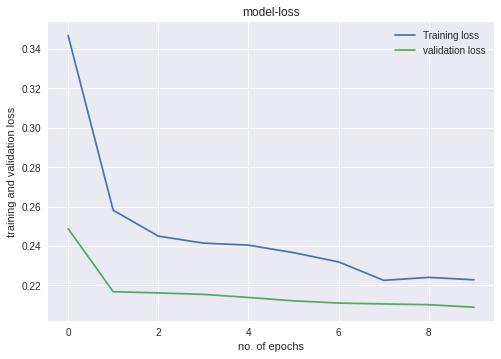

In [108]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('model-loss')
plt.ylabel('training and validation loss')
plt.xlabel('no. of epochs')
plt.legend(['Training loss' , 'validation loss'])

Plot Cumulative Gain Curve

In [109]:
pred_1 = model.predict_proba(X)
#array to store probability of class 0 and 1 for each sample
probs = np.concatenate((1-pred_1[0],pred_1[0]))
probs = probs.reshape(1,2)

In [110]:
for i in range(1,pred_1.shape[0]):
  temp = np.concatenate((1-pred_1[i],pred_1[i]))
  temp = temp.reshape(1 , 2)
  #concatenating temp with probs
  probs = np.concatenate((probs,temp))

In [111]:
probs.shape

(753, 2)

In [112]:
probs

array([[0.00119984, 0.99880016],
       [0.6505333 , 0.34946668],
       [0.14862072, 0.8513793 ],
       ...,
       [0.09737098, 0.902629  ],
       [0.46462846, 0.53537154],
       [0.05861694, 0.94138306]], dtype=float32)

In [113]:
#make the required import
!pip install scikit-plot
import scikitplot as skplt

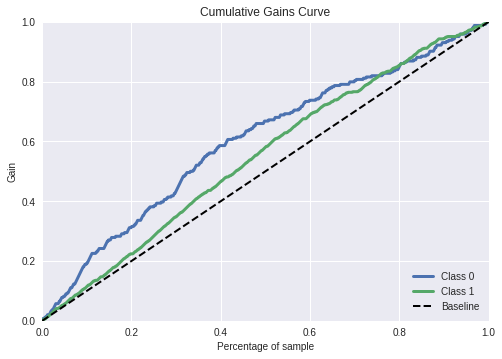

In [114]:
#plot the gain curve
skplt.metrics.plot_cumulative_gain(y, probs)